In [1]:


#Identically distributed
#This means that the samples come from the same r.v(random variable). More specifically, this means that we sample from 
#the same function each time. Below would be some identically distributed samples:

def rv1():
    return 1

identically_distributed_samples = [rv1() for _ in range(10)]

identically_distributed_samples



[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [2]:
def rv2():
    return 2

not_identically_distributed_samples = [rv1() for _ in range(5)] + [rv2() for _ in range(5)]

not_identically_distributed_samples

[1, 1, 1, 1, 1, 2, 2, 2, 2, 2]

In [3]:
# Say we are measuring the height of pigs at a farm. We randomly pick a pig and then we measure the height.

#This is a real life r.v. Now let's say that we accidentally picked up a chicken and measured it and put it in the data set.
#Then that is not identically distributed right!

# So notice that the answer will greatly depend on how your problem is framed.

#The most important thing to remember here is to always know what you are sampling from.
|

SyntaxError: invalid syntax (Temp/ipykernel_14504/1364169317.py, line 9)

In [1]:
#Independent
#The next property that we will discuss is very hard to wrap your mind around, but this is independence.
#Two r.v. are independent if they do not depend on each other. In function speak, this would mean that the independent
#variables don't take as parameters each other (or any r.v. that is dependent on the other).
#Okay, confusing right, well, let's look at an example.

#These r.v. are independent:
def ind1():
    return 4

def ind2():
    return 5

ind1(), ind2()

(4, 5)

In [2]:
x = 3

def not_ind():
    global x
    x += 1
    return x

not_ind_samples = [not_ind() for _ in range(5)]
not_ind_samples


[4, 5, 6, 7, 8]

In [3]:
from numpy.random import rand

x = 3

def not_ind_adv():
    global x
    if rand() < .01:
        x += 1
    return x

not_ind_samples = [not_ind_adv() for _ in range(5)]

not_ind_samples

[3, 3, 3, 3, 3]

In [ ]:


#The S&P 500 index, or Standard & Poor's 500, is a very
#important index that tracks the performance of the stocks
#of 500 large-cap companies in the U.S. The ticker symbol
#for the S&P 500 index is ^GSPC. The series of letters
#represents the performance of the 500 stocks listed on 
#the S&P.


#ARKK is an actively managed Exchange Traded Fund (ETF) that seeks long-term growth of capital by investing under
#normal circumstances primarily (at least 65% of its assets)


#The Russell 1000 Index represents the top 1000 companies by market capitalization in the United States. 
#The index is a subset of the Russell 3000 Index. The Russell 1000 index comprises about 92% of the total market cap of
#all listed stocks in the U.S. equity market.


# rlv relevium technologies Inc

In [ ]:
from pandas_datareader import data

In [ ]:
arkk = data.DataReader('ARKK', 'yahoo', start='2015/01/01', end='2018/01/01')
arkk = arkk.resample('M').last().pct_change()
arkk.head()

In [ ]:
rlg = data.DataReader('^RLG', 'yahoo', start='2015/01/01', end='2018/01/01')
rlg = rlg.resample('M').last().pct_change()
rlg.head()


In [ ]:
rlv = data.DataReader('^RLV', 'yahoo', start='2015/01/01', end='2018/01/01')
rlv = rlv.resample('M').last().pct_change()
rlv.head()

In [ ]:
data = {'arkk':arkk['Adj Close'], 'rlg':rlg['Adj Close'], 'rlv':rlv['Adj Close']}

In [ ]:
import pandas as pd
df = pd.DataFrame(data)
df.head()

In [ ]:
df = df.dropna()
df.head()

In [ ]:
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices('arkk ~ rlg + rlv', data=df, return_type='dataframe')
y.head()

In [ ]:
X.head()

In [ ]:
y = df['arkk']
X = df[['rlg', 'rlv']]
y.head()

In [ ]:
X.head()

In [ ]:
X = sm.add_constant(X)
X.head()

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

In [ ]:
# rlg value
results.params[1]

In [ ]:
#rlv value
results.params[2]

In [ ]:

#Arguments:
#p: probability
#dof: number of degrees of freedom

#The survival function is 1 minus the cumulative distribution function.
#The survival function is a function that gives the probability that a patient, device, or other object of 
#interest will survive past a certain time. The survival function is also known as the survivor function or 
#reliability function.

#isf -- inverse survival function

#Survival function can be also interpreted as the probability that a certain object of interest will survive beyond a
#certain time t. The value of the function lies between 0 and 1(inclusive) and it is a non-increasing function.
dof = 33
from scipy import stats
stats.t.isf(0.025, dof)

In [ ]:
#Heteroskedasticity

#homoscedasticity and heteroscedasticity is that homoscedasticity is (statistics) a property of a set of random variables
#where each variable has the same finite variance while heteroscedasticity is (statistics) the property of a series of 
#random variables of not every variable having the same finite variance.

#What is homoscedasticity example?
#Example of Homoskedastic

#For example, suppose you wanted to explain student test scores using the amount of time each student spent studying. 
#In this case, the test scores would be the dependent variable and the time spent studying would be the predictor variable.

#What is the purpose of homoscedasticity?
#Homoscedasticity, or homogeneity of variances, is an assumption of equal or similar variances in different groups 
#being compared. This is an important assumption of parametric statistical tests because they are sensitive to any
#dissimilarities. Uneven variances in samples result in biased and skewed test results.

#Why is heterogeneity of variance bad?
#However, if heterogeneity is present, the variance in the dependent variable is different at different levels of the 
#independent variables, and averaging the sample variances may result in an incorrect error term, which in turn will bias 
#the significance test.


#How is heteroscedasticity detected?
#A formal test called Spearman's rank correlation test is used by the researcher to detect the presence of 
#heteroscedasticity. ... The researcher then fits the model to the data by obtaining the absolute value of the residual 
#and then ranking them in ascending or descending manner to detect heteroscedasticity.


#How is Homoscedasticity determined?
#So when is a data set classified as having homoscedasticity? The general rule of thumb1 is: If the ratio of the largest
#variance to the smallest variance is 1.5 or below, the data is homoscedastic.

#What are the four assumptions of linear regression?
Assumption 1: Linear Relationship.
Assumption 2: Independence.
Assumption 3: Homoscedasticity.
Assumption 4: Normality.
    
    
#How can Heteroskedasticity be prevented?
There are three common ways to fix heteroscedasticity:
Transform the dependent variable. One way to fix heteroscedasticity is to transform the dependent variable in some way. ...
Redefine the dependent variable. Another way to fix heteroscedasticity is to redefine the dependent variable. ...
Use weighted regression.

#Why do we test for heteroskedasticity?
It is used to test for heteroskedasticity in a linear regression model and assumes that the error terms are normally 
distributed. It tests whether the variance of the errors from a regression is dependent on the values of the independent 
variables.

#What is the null hypothesis for homoscedasticity?
The null hypothesis of this chi-squared test is homoscedasticity, and the alternative hypothesis would indicate
heteroscedasticity. Since the Breusch–Pagan test is sensitive to departures from normality or small sample sizes, 
the Koenker–Bassett or 'generalized Breusch–Pagan' test is commonly used instead.

#How do you test for Multicollinearity?
Detecting Multicollinearity
Step 1: Review scatterplot and correlation matrices. ...
Step 2: Look for incorrect coefficient signs. ...
Step 3: Look for instability of the coefficients. ...
Step 4: Review the Variance Inflation Factor.
    
    
#How do you deal with homoscedasticity?
Another approach for dealing with heteroscedasticity is to transform the dependent variable using one of the variance 
stabilizing transformations. A logarithmic transformation can be applied to highly skewed variables, while count variables
can be transformed using a square root transformation.

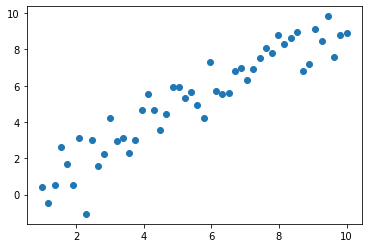

In [4]:
import matplotlib.pyplot as plt
import numpy as np
z = np.linspace(1, 10, 50)
a = []
for i in z:
    v = i + np.random.normal()
    a.append(v)
plt.scatter(z, a)

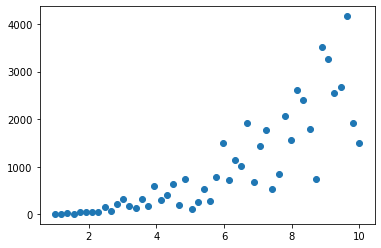

In [5]:
z = np.linspace(1, 10, 50)
a = []
c = 1
for i in z:
    v = i*c*np.random.randint(low=1, high=10)
    a.append(v)
    c =  c + 1
plt.scatter(z, a)

In [7]:
#Breusch Pagan Test
#nR**2
#df=no. of IVs

In [6]:
X.head()

NameError: name 'X' is not defined

In [ ]:
residuals=results.resid
residuals

In [ ]:
residuals = results.resid**2
model_2 = sm.OLS(residuals, X)
results_2 = model_2.fit()
results_2.summary()

In [ ]:
# no. of obs X R**2 value
36 * 0.132

In [ ]:
5.991

In [ ]:
# results.model.exog  results from original model
# 0.10203148058376516  > 0.05 (pvalue) we cannot reject H0
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(results.resid, results.model.exog)
bp_test

In [ ]:
#Multicollinearity

#Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a
problem because independent variables should be independent. If the degree of correlation between variables is high enough,
it can cause problems when you fit the model and interpret the results.

#Why is Multicollinearity a Potential Problem?
A key goal of regression analysis is to isolate the relationship between each independent variable and the dependent 
variable. The interpretation of a regression coefficient is that it represents the mean change in the dependent variable 
for each 1 unit change in an independent variable when you hold all of the other independent variables constant. That last
portion is crucial for our discussion about multicollinearity.

#The idea is that you can change the value of one independent variable and not the others. However, when independent
variables are correlated, it indicates that changes in one variable are associated with shifts in another variable. The
stronger the correlation, the more difficult it is to change one variable without changing another. It becomes difficult
for the model to estimate the relationship between each independent variable and the dependent variable independently 
because the independent variables tend to change in unison.

#There are many reasons why multicollinearity may occur.

It may occur as a result of:

The inclusion of identical variables. For example, one may have identical variables in a dataset, such as mass in kilograms and mass in pounds.

Creation of new variables that are dependent on others. When we create variables that depend on other variables, we introduce redundant information to the model. As such, we may inadvertently encourage the occurrence of multicollinearity.

Inadequate data. In some cases, when the data is inadequate, we may experience multicollinearity. This is due to the small sample size, which might, in turn, experience great variance.

In [4]:
df.head()

NameError: name 'df' is not defined

In [ ]:
from pandas_datareader import data
rm = data.DataReader('^GSPC', 'yahoo', start='2015/01/01', end='2018/01/01')
rm = rm.resample('M').last().pct_change()
rm.head()


In [ ]:
df = df.join(rm['Adj Close'])
df.head()

In [ ]:
df = df.rename(columns={'Adj Close': 'rm'})
df.head()

In [ ]:
results.summary()

In [ ]:
y_3, X_3 = dmatrices('arkk ~ rlg + rlv + rm', data=df, return_type='dataframe')
model_3 = sm.OLS(y_3, X_3)
results_3 = model_3.fit()
results_3.summary()

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(df[['arkk', 'rlg', 'rlv', 'rm']], figsize=(15, 10))
plt.show()

In [ ]:



#How to check multicollinearity using python?

#Multicollinearity mostly occurs in a regression model when two or more independent variable are highly correlated to 
#eachother.

#The variance inflation factor (VIF) can be used to check the multicollinearity.

#VIF starts at 1 and has no limits. VIF = 1, no correlation beetween idependent variables. VIF > 10 high 
#multicollinearity between independent variables.

# Importing libraries
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Reading Files
df= pd.read_csv('california_housing_train.csv')
df.head()

# Defining Function
#We will define a function which will check the correlation between the independent variables.


def calc_VIF(x):
  vif= pd.DataFrame()
  vif['variables']=x.columns
  vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

  return(vif)
# showing multicollinearity
x=df.iloc[:,:-1]
calc_VIF(x)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df = pd.read_csv("Advertising1.csv")

In [ ]:
df.drop(['Unnamed: 0'],1,inplace=True)
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
#Corelation Metrics
df.iloc[:,1:].corr()

In [ ]:
sns.heatmap(df.corr(),linewidth=1.5,square=True, cmap="YlGnBu")

In [ ]:
#Variance Inflation Factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X = df.iloc[:,:-1]
calc_vif(X)